## Partie 1 - Nettoyage et Formatage des données

In [94]:
import pandas as pd

### Nettoyage des données

In [95]:
books = pd.read_csv('makers_project1.csv')
books.head()

,Unnamed: 0,Titres,"[Formats, Prix]",Nombre de pages Format Broché,Taille du fichier Kindle,Nombre de pages Format Poche,Nombre de pages Format Relié,Dimensions Format Broché,Dimensions Format Poche,Dimensions Format Relié,Evaluations (sur 5),Nombre d'évaluations,Liens
0,0,Recettes minceur au Thermomix,"['Broché 8,90']",191,None,None,None,19.2 x 1.8 x 20.1 cm,None,None,"4,0",84,https://www.amazon.fr//Recettes-minceur-au-The...
1,1,Calendrier 365 recettes légères Marmiton - L'A...,"['Broché 11,90']",2809658048,None,None,None,11 x 4.7 x 15 cm,None,None,"4,2",30,https://www.amazon.fr//Ann%C3%A9e-Bloc-recette...
2,2,Recettes light inratables au robot cuiseur !,"['Format Kindle 10,99', 'Relié 15,95']",None,67067 KB,None,208,None,None,20.2 x 2.8 x 26.7 cm,"4,4",410,https://www.amazon.fr//Recettes-light-inratabl...
3,3,80 Recettes lights au Cookéo: Gardez la ligne ...,"['Broché 9,89', 'Format Kindle 4,90']",88,: Illimité,None,None,15.24 x 0.56 x 22.86 cm,None,None,"4,2",338,https://www.amazon.fr//Recettes-lights-Cook%C3...
4,4,Le grand livre de la cuisine saine et facile,"['Broché 15,90']",178,None,None,None,22.4 x 1.2 x 19.3 cm,None,None,"4,4",18,https://www.amazon.fr//grand-livre-cuisine-sai...


In [96]:
books_v1 = books.copy()
del books_v1['Unnamed: 0']
del books_v1['Taille du fichier Kindle']
books_v1.head()

,Titres,"[Formats, Prix]",Nombre de pages Format Broché,Nombre de pages Format Poche,Nombre de pages Format Relié,Dimensions Format Broché,Dimensions Format Poche,Dimensions Format Relié,Evaluations (sur 5),Nombre d'évaluations,Liens
0,Recettes minceur au Thermomix,"['Broché 8,90']",191,None,None,19.2 x 1.8 x 20.1 cm,None,None,"4,0",84,https://www.amazon.fr//Recettes-minceur-au-The...
1,Calendrier 365 recettes légères Marmiton - L'A...,"['Broché 11,90']",2809658048,None,None,11 x 4.7 x 15 cm,None,None,"4,2",30,https://www.amazon.fr//Ann%C3%A9e-Bloc-recette...
2,Recettes light inratables au robot cuiseur !,"['Format Kindle 10,99', 'Relié 15,95']",None,None,208,None,None,20.2 x 2.8 x 26.7 cm,"4,4",410,https://www.amazon.fr//Recettes-light-inratabl...
3,80 Recettes lights au Cookéo: Gardez la ligne ...,"['Broché 9,89', 'Format Kindle 4,90']",88,None,None,15.24 x 0.56 x 22.86 cm,None,None,"4,2",338,https://www.amazon.fr//Recettes-lights-Cook%C3...
4,Le grand livre de la cuisine saine et facile,"['Broché 15,90']",178,None,None,22.4 x 1.2 x 19.3 cm,None,None,"4,4",18,https://www.amazon.fr//grand-livre-cuisine-sai...


In [97]:
#Taille du tableau
taille = books_v1.shape
print('Nombre de lignes =', taille[0])

Nombre de lignes = 309


In [98]:
#Nous allons ici supprimer les livres en doublons
titres = books_v1['Titres']
for titre in titres:
    index_names = books_v1[ books['Titres'] == titre ].index
    books_v1.drop(index_names[1:], inplace=True)

<ipython-input-98-13668e6a99ef>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_names = books_v1[ books['Titres'] == titre ].index


In [99]:
# Taille du tableau après élimination des doublons
taille = books_v1.shape
print('Nombre de lignes =', taille[0])

Nombre de lignes = 185


### Formatage des données

In [100]:
# Dans la colonne '[Formats, Prix]', nous allons changer le format 'Fotmat Kindle' en 'Kindle'
formats_prix = books_v1['[Formats, Prix]']
res = []
ch = ''
for formats in formats_prix:
    if 'Kindle' in formats:
        ch = formats.replace('Format ', '')
        res.append(ch)
    else:
        res.append(formats)

In [101]:
#Remplaçons la colonne '[Formats, Prix]' par la liste juste ci-dessus
books_v1.insert(2, "Format/Prix", res)
del books_v1['[Formats, Prix]']
books_v1 = books_v1.reset_index()
del books_v1['index']
books_v1

,Titres,Format/Prix,Nombre de pages Format Broché,Nombre de pages Format Poche,Nombre de pages Format Relié,Dimensions Format Broché,Dimensions Format Poche,Dimensions Format Relié,Evaluations (sur 5),Nombre d'évaluations,Liens
0,Recettes minceur au Thermomix,"['Broché 8,90']",191,None,None,19.2 x 1.8 x 20.1 cm,None,None,"4,0",84,https://www.amazon.fr//Recettes-minceur-au-The...
1,Calendrier 365 recettes légères Marmiton - L'A...,"['Broché 11,90']",2809658048,None,None,11 x 4.7 x 15 cm,None,None,"4,2",30,https://www.amazon.fr//Ann%C3%A9e-Bloc-recette...
2,Recettes light inratables au robot cuiseur !,"['Kindle 10,99', 'Relié 15,95']",None,None,208,None,None,20.2 x 2.8 x 26.7 cm,"4,4",410,https://www.amazon.fr//Recettes-light-inratabl...
3,80 Recettes lights au Cookéo: Gardez la ligne ...,"['Broché 9,89', 'Kindle 4,90']",88,None,None,15.24 x 0.56 x 22.86 cm,None,None,"4,2",338,https://www.amazon.fr//Recettes-lights-Cook%C3...
4,Le grand livre de la cuisine saine et facile,"['Broché 15,90']",178,None,None,22.4 x 1.2 x 19.3 cm,None,None,"4,4",18,https://www.amazon.fr//grand-livre-cuisine-sai...
...,...,...,...,...,...,...,...,...,...,...,...
180,Jeûne Intermittent et Régime Cétogène: 2 livre...,"['Broché 7,99', 'Kindle 3,99']",94,None,None,20.32 x 0.56 x 25.4 cm,None,None,"3,8",89,https://www.amazon.fr//Je%C3%BBne-Intermittent...
181,Mon journal de suivi minceur: Cahier de suivi ...,"['Broché 7,99']",100,None,None,21.59 x 0.58 x 27.94 cm,None,None,"5,0",4,https://www.amazon.fr//Mon-journal-suivi-mince...
182,Recettes minceur - Tous en cuisine !,"['Broché 4,99']",192,None,None,None,None,None,"4,2",3,https://www.amazon.fr//Recettes-minceur-Tous-e...
183,Deliciously Ella : ma cuisine express pour man...,"['Broché 19,90']",272,None,None,18.7 x 2.4 x 23 cm,None,None,"4,5",2,https://www.amazon.fr//Deliciously-Ella-quotid...


In [102]:
# Nous allons désormais nous occuper de la colonne '[Formats, Prix]'
# Je souhaiterais la scinder en trois colonnes correspondant aux quatres formats (Broché, Kindle, Poche, Relié)
import ast
dict_formats = {
    'Broché': 'None',
    'Kindle': 'None',
    'Poche': 'None',
    'Relié': 'None'
}   
formats_prix = books_v1['Format/Prix']
res = []
for formats in formats_prix:
    my_dict = dict_formats.copy()
    elems = ast.literal_eval(formats)
    for elem in elems:
        l = elem.split()
        format_ = l[0]
        prix = l[1]
        if format_ in dict_formats.keys():
            my_dict.update({format_: prix})
    prix = list(my_dict.values())
    res.append(prix)
res
prix = pd.DataFrame(res, columns = ['Prix Broché', 'Prix Kindle', 'Prix Poche', 'Prix Relié'])
prix

,Prix Broché,Prix Kindle,Prix Poche,Prix Relié
0,"8,90",None,None,None
1,"11,90",None,None,None
2,None,"10,99",None,"15,95"
3,"9,89","4,90",None,None
4,"15,90",None,None,None
...,...,...,...,...
180,"7,99","3,99",None,None
181,"7,99",None,None,None
182,"4,99",None,None,None
183,"19,90",None,None,None


In [103]:
index_books_v1 = list(books_v1.index)
print(len(index_books_v1))

185


In [104]:
books_v1.insert(2, 'Prix Broché', prix['Prix Broché'])
books_v1.insert(3, 'Prix Kindle', prix['Prix Kindle'])
books_v1.insert(4, 'Prix Poche', prix['Prix Poche'])
books_v1.insert(5, 'Prix Relié', prix['Prix Relié'])
del books_v1['Format/Prix']
books_v1

,Titres,Prix Broché,Prix Kindle,Prix Poche,Prix Relié,Nombre de pages Format Broché,Nombre de pages Format Poche,Nombre de pages Format Relié,Dimensions Format Broché,Dimensions Format Poche,Dimensions Format Relié,Evaluations (sur 5),Nombre d'évaluations,Liens
0,Recettes minceur au Thermomix,"8,90",None,None,None,191,None,None,19.2 x 1.8 x 20.1 cm,None,None,"4,0",84,https://www.amazon.fr//Recettes-minceur-au-The...
1,Calendrier 365 recettes légères Marmiton - L'A...,"11,90",None,None,None,2809658048,None,None,11 x 4.7 x 15 cm,None,None,"4,2",30,https://www.amazon.fr//Ann%C3%A9e-Bloc-recette...
2,Recettes light inratables au robot cuiseur !,None,"10,99",None,"15,95",None,None,208,None,None,20.2 x 2.8 x 26.7 cm,"4,4",410,https://www.amazon.fr//Recettes-light-inratabl...
3,80 Recettes lights au Cookéo: Gardez la ligne ...,"9,89","4,90",None,None,88,None,None,15.24 x 0.56 x 22.86 cm,None,None,"4,2",338,https://www.amazon.fr//Recettes-lights-Cook%C3...
4,Le grand livre de la cuisine saine et facile,"15,90",None,None,None,178,None,None,22.4 x 1.2 x 19.3 cm,None,None,"4,4",18,https://www.amazon.fr//grand-livre-cuisine-sai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Jeûne Intermittent et Régime Cétogène: 2 livre...,"7,99","3,99",None,None,94,None,None,20.32 x 0.56 x 25.4 cm,None,None,"3,8",89,https://www.amazon.fr//Je%C3%BBne-Intermittent...
181,Mon journal de suivi minceur: Cahier de suivi ...,"7,99",None,None,None,100,None,None,21.59 x 0.58 x 27.94 cm,None,None,"5,0",4,https://www.amazon.fr//Mon-journal-suivi-mince...
182,Recettes minceur - Tous en cuisine !,"4,99",None,None,None,192,None,None,None,None,None,"4,2",3,https://www.amazon.fr//Recettes-minceur-Tous-e...
183,Deliciously Ella : ma cuisine express pour man...,"19,90",None,None,None,272,None,None,18.7 x 2.4 x 23 cm,None,None,"4,5",2,https://www.amazon.fr//Deliciously-Ella-quotid...


In [105]:
# Convertir le nouveau tableau en fichier csv
books_v1.to_csv("books_v1.csv")

## Partie 2 - Analyse des données

In [106]:
import numpy as np
import matplotlib.pyplot as plt

#### Pour l'analyse, nous allons nous concentrer uniquement sur les livres les mieux notés, avec une note supérieur à 4/5

In [107]:
books_v2 = books_v1[(books_v1['Evaluations (sur 5)'] >= '4') & (books_v1['Evaluations (sur 5)'] != 'None')]
books_v2 = books_v2.reset_index()
del books_v2['index']
books_v2

,Titres,Prix Broché,Prix Kindle,Prix Poche,Prix Relié,Nombre de pages Format Broché,Nombre de pages Format Poche,Nombre de pages Format Relié,Dimensions Format Broché,Dimensions Format Poche,Dimensions Format Relié,Evaluations (sur 5),Nombre d'évaluations,Liens
0,Recettes minceur au Thermomix,"8,90",None,None,None,191,None,None,19.2 x 1.8 x 20.1 cm,None,None,"4,0",84,https://www.amazon.fr//Recettes-minceur-au-The...
1,Calendrier 365 recettes légères Marmiton - L'A...,"11,90",None,None,None,2809658048,None,None,11 x 4.7 x 15 cm,None,None,"4,2",30,https://www.amazon.fr//Ann%C3%A9e-Bloc-recette...
2,Recettes light inratables au robot cuiseur !,None,"10,99",None,"15,95",None,None,208,None,None,20.2 x 2.8 x 26.7 cm,"4,4",410,https://www.amazon.fr//Recettes-light-inratabl...
3,80 Recettes lights au Cookéo: Gardez la ligne ...,"9,89","4,90",None,None,88,None,None,15.24 x 0.56 x 22.86 cm,None,None,"4,2",338,https://www.amazon.fr//Recettes-lights-Cook%C3...
4,Le grand livre de la cuisine saine et facile,"15,90",None,None,None,178,None,None,22.4 x 1.2 x 19.3 cm,None,None,"4,4",18,https://www.amazon.fr//grand-livre-cuisine-sai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Une journée dans mon assiette Vegan,None,"14,99",None,"19,95",None,None,192,None,None,20.3 x 2.3 x 23.9 cm,"4,7",184,https://www.amazon.fr//Une-journ%C3%A9e-dans-a...
106,Smoothies et cie avec l'Ultrablend cook,"9,95","7,99",None,None,168,None,None,23.4 x 1.8 x 18.5 cm,None,None,"4,5",68,https://www.amazon.fr//Smoothies-cie-avec-lUlt...
107,Mon journal de suivi minceur: Cahier de suivi ...,"7,99",None,None,None,100,None,None,21.59 x 0.58 x 27.94 cm,None,None,"5,0",4,https://www.amazon.fr//Mon-journal-suivi-mince...
108,Recettes minceur - Tous en cuisine !,"4,99",None,None,None,192,None,None,None,None,None,"4,2",3,https://www.amazon.fr//Recettes-minceur-Tous-e...


### Titre

In [108]:
titres = books_v2['Titres']
L = []
for titre in titres:
    elems = titre.split()
    for elem in elems:
        elem = elem.lower()
        if len(elem) > 3 and elem not in ['dans', 'pour','avec', 'sans']:
            L.append(elem)
L[:5]

['recettes', 'minceur', 'thermomix', 'calendrier', 'recettes']

In [109]:
from collections import Counter

In [110]:
# Classement des 20 mots les plus utilisés pour les titres: (mot, nombre d'occurences)
Counter(L).most_common(20)

[('recettes', 75),
 ('cuisine', 20),
 ('minceur', 17),
 ('livre', 9),
 ('cahier', 9),
 ('régime', 9),
 ('carnet', 9),
 ('suivi', 8),
 ('light', 7),
 ('facile', 7),
 ('alimentaire', 7),
 ('bowl', 6),
 ('plats', 6),
 ('faciles', 6),
 ('semaine', 6),
 ('thermomix', 5),
 ('super', 5),
 ('votre', 5),
 ('monde', 5),
 ('légères', 4)]

### Prix moyen et median par type de format

##### Combien de livres proposent un format Broché

In [111]:
nb_livres_broché = len(books_v2[books_v2['Prix Broché'] != 'None']['Prix Broché'])
print('Le nombre de livres en format broché est de: ' + str(nb_livres_broché) +'.')
print('Ainsi, ' + str(int((nb_livres_broché*100)/110)) + '% des livres proposent ce format.')

Le nombre de livres en format broché est de: 85.
Ainsi, 77% des livres proposent ce format.


###### Prix moyen et median pour le format physique Broché

In [112]:
prix_broché = []
for prix in books_v2[books_v2['Prix Broché'] != 'None']['Prix Broché']:
    prix_broché.append(float(prix.replace(',', '.')))

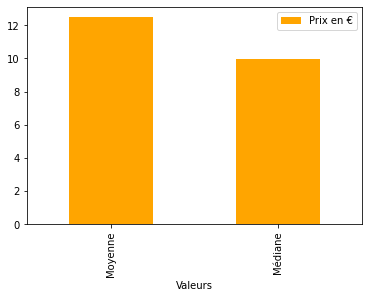

In [113]:
mean = np.mean(prix_broché)
median = np.median(prix_broché)
df = pd.DataFrame({'Valeurs':['Moyenne', 'Médiane'], 'Prix en €':[mean, median]})
df.plot.bar(x='Valeurs', y='Prix en €', color='orange')

In [114]:
print('Le prix minimum est de:', str(min(prix_broché)) + '€')
print('Le prix maximum est de:', str(max(prix_broché)) + '€')
print('-------------------------')
print('Le prix moyen est de:', str(round(mean, 2)) + '€')
print('Le prix median est de:', str(median) + '€')

Le prix minimum est de: 3.5€
Le prix maximum est de: 37.78€
-------------------------
Le prix moyen est de: 12.48€
Le prix median est de: 9.95€


# ----------------------------------------------------------------------------------------

##### Combien de livres proposent un format Kindle

In [115]:
nb_livres_kindle = len(books_v2[books_v2['Prix Kindle'] != 'None']['Prix Kindle'])
print('Le nombre de livres en format kindle est de: ' + str(nb_livres_kindle) +'.')
print('Ainsi, ' + str(int((nb_livres_kindle*100)/110)) + '% des livres proposent ce format.')

Le nombre de livres en format kindle est de: 54.
Ainsi, 49% des livres proposent ce format.


###### Prix moyen et median pour le format numérique Kindle

In [116]:
prix_kindle = []
for prix in books_v2[books_v2['Prix Kindle'] != 'None']['Prix Kindle']:
    prix_kindle.append(float(prix.replace(',', '.')))

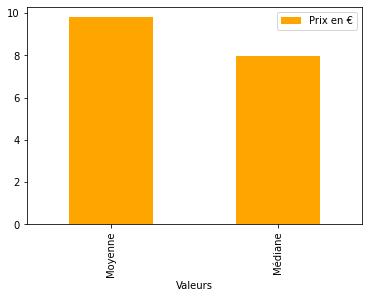

In [117]:
mean = np.mean(prix_kindle)
median = np.median(prix_kindle)
df = pd.DataFrame({'Valeurs':['Moyenne', 'Médiane'], 'Prix en €':[mean, median]})
df.plot.bar(x='Valeurs', y='Prix en €', color='orange')

In [118]:
print('Le prix minimum est de:', str(min(prix_kindle)) + '€')
print('Le prix maximum est de:', str(max(prix_kindle)) + '€')
print('-------------------------')
print('Le prix moyen est de:', str(round(mean, 2)) + '€')
print('Le prix median est de:', str(median) + '€')

Le prix minimum est de: 1.99€
Le prix maximum est de: 28.99€
-------------------------
Le prix moyen est de: 9.81€
Le prix median est de: 7.99€


# ----------------------------------------------------------------------------------------

##### Combien de livres proposent un format Poche

In [119]:
nb_livres_poche = len(books_v2[books_v2['Prix Poche'] != 'None']['Prix Poche'])
print('Le nombre de livres en format poche est de: ' + str(nb_livres_poche) +'.')
print('Ainsi, ' + str(int((nb_livres_poche*100)/110)) + '% des livres proposent ce format.')

Le nombre de livres en format poche est de: 7.
Ainsi, 6% des livres proposent ce format.


###### Prix moyen et median pour le format physique Poche

In [120]:
prix_poche = []
for prix in books_v2[books_v2['Prix Poche'] != 'None']['Prix Poche']:
    prix_poche.append(float(prix.replace(',', '.')))

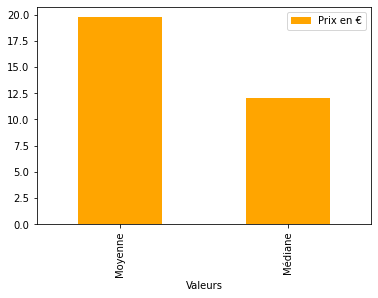

In [121]:
mean = np.mean(prix_poche)
median = np.median(prix_poche)
df = pd.DataFrame({'Valeurs':['Moyenne', 'Médiane'], 'Prix en €':[mean, median]})
df.plot.bar(x='Valeurs', y='Prix en €', color='orange')

In [122]:
print('Le prix minimum est de:', str(min(prix_poche)) + '€')
print('Le prix maximum est de:', str(max(prix_poche)) + '€')
print('-------------------------')
print('Le prix moyen est de:', str(round(mean, 2)) + '€')
print('Le prix median est de:', str(median) + '€')

Le prix minimum est de: 6.0€
Le prix maximum est de: 68.17€
-------------------------
Le prix moyen est de: 19.75€
Le prix median est de: 12.0€


# ----------------------------------------------------------------------------------------

##### Combien de livres proposent un format Relié

In [123]:
nb_livres_relié = len(books_v2[books_v2['Prix Relié'] != 'None']['Prix Relié'])
print('Le nombre de livres en format relié est de: ' + str(nb_livres_relié) +'.')
print('Ainsi, ' + str(int((nb_livres_relié*100)/110)) + '% des livres proposent ce format.')

Le nombre de livres en format relié est de: 23.
Ainsi, 20% des livres proposent ce format.


###### Prix moyen et median pour le format physique Relié

In [124]:
prix_relié = []
for prix in books_v2[books_v2['Prix Relié'] != 'None']['Prix Relié']:
    prix_relié.append(float(prix.replace(',', '.')))

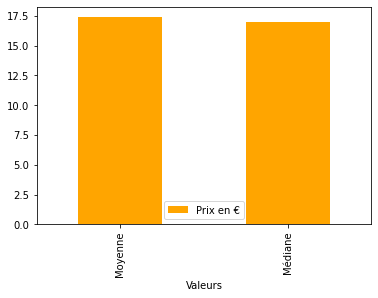

In [125]:
mean = np.mean(prix_relié)
median = np.median(prix_relié)
df = pd.DataFrame({'Valeurs':['Moyenne', 'Médiane'], 'Prix en €':[mean, median]})
df.plot.bar(x='Valeurs', y='Prix en €', color='orange')

In [126]:
print('Le prix minimum est de:', str(min(prix_relié)) + '€')
print('Le prix maximum est de:', str(max(prix_relié)) + '€')
print('-------------------------')
print('Le prix moyen est de:', str(round(mean, 2)) + '€')
print('Le prix median est de:', str(median) + '€')

Le prix minimum est de: 7.95€
Le prix maximum est de: 29.95€
-------------------------
Le prix moyen est de: 17.39€
Le prix median est de: 16.95€


### Classement des dimensions des formats physiques

In [127]:
def get_each_dimension_parameters(dimensions):
    longueur, largeur, hauteur = [], [], []
    for dimension in dimensions:
        dim = dimension.split('x')
        if len(dim) == 3:
            longueur.append(float(dim[0].strip()))
            largeur.append(float(dim[1].strip()))
            hauteur.append(float(dim[2].replace('cm', '').strip()))
    return longueur, largeur, hauteur

#### Dimension moyen et median pour le format Broché

In [128]:
# Top 5 des dimensions les plus utilisées : (dimensions, occurences)
dimensions = books_v2[books_v2['Dimensions Format Broché'] != 'None']['Dimensions Format Broché']
dimensions.value_counts()[:5]

18.5 x 1.5 x 23.5 cm       3
19.05 x 0.64 x 23.5 cm     3
21.59 x 0.61 x 27.94 cm    2
19.2 x 1.8 x 20.1 cm       2
17.8 x 1.5 x 11 cm         2
Name: Dimensions Format Broché, dtype: int64

In [129]:
longueurs = get_each_dimension_parameters(dimensions)[0]
largeurs = get_each_dimension_parameters(dimensions)[1]
hauteurs = get_each_dimension_parameters(dimensions)[2]

In [130]:
# On peut ainsi avoir le format moyen et median
print("le format moyen est donc: " + str(round(np.mean(longueurs), 2)) + " x " + str(round(np.mean(largeurs),2)) + " x " + str(round(np.mean(hauteurs),2)) + " cm")
print('------------------------------')
print("le format median est donc: " + str(round(np.median(longueurs), 2)) + " x " + str(round(np.median(largeurs),2)) + " x " + str(round(np.median(hauteurs),2)) + " cm")  

le format moyen est donc: 18.09 x 1.76 x 21.7 cm
------------------------------
le format median est donc: 18.3 x 1.5 x 22.86 cm


# ----------------------------------------------------------------------------------------

#### Dimension moyen et median pour le format Poche

In [131]:
# Top 5 des dimensions les plus utilisées : (dimensions, occurences)
dimensions = books_v2[(books_v2['Dimensions Format Poche'] != 'None') & (books_v2['Dimensions Format Poche'] != 'Leduc.S (1 janvier 2018)')]['Dimensions Format Poche']
dimensions.value_counts()[:3]

LEDUC.S (1 janvier 1905)    1
16 x 0.8 x 22 cm            1
21 x 1.2 x 21 cm            1
Name: Dimensions Format Poche, dtype: int64

In [132]:
longueurs = get_each_dimension_parameters(dimensions)[0]
largeurs = get_each_dimension_parameters(dimensions)[1]
hauteurs = get_each_dimension_parameters(dimensions)[2]

In [133]:
# On peut ainsi avoir le format moyen et median
print("le format moyen est donc: " + str(round(np.mean(longueurs), 2)) + " x " + str(round(np.mean(largeurs),2)) + " x " + str(round(np.mean(hauteurs),2)) + " cm")
print('------------------------------')
print("le format median est donc: " + str(round(np.median(longueurs), 2)) + " x " + str(round(np.median(largeurs),2)) + " x " + str(round(np.median(hauteurs),2)) + " cm")  

le format moyen est donc: 18.36 x 1.3 x 17.66 cm
------------------------------
le format median est donc: 17.8 x 1.3 x 17.8 cm


# ----------------------------------------------------------------------------------------

#### Dimension moyen et median pour le format Relié

In [134]:
# Top 5 des dimensions les plus utilisées : (dimensions, occurences)
dimensions = books_v2[books_v2['Dimensions Format Relié'] != 'None']['Dimensions Format Relié']
dimensions.value_counts()[:3]

13 x 2 x 19 cm          1
21.5 x 1.2 x 21.5 cm    1
18.7 x 1.8 x 22.8 cm    1
Name: Dimensions Format Relié, dtype: int64

In [135]:
longueurs = get_each_dimension_parameters(dimensions)[0]
largeurs = get_each_dimension_parameters(dimensions)[1]
hauteurs = get_each_dimension_parameters(dimensions)[2]

In [136]:
# On peut ainsi avoir le format moyen et median
print("le format moyen est donc: " + str(round(np.mean(longueurs), 2)) + " x " + str(round(np.mean(largeurs),2)) + " x " + str(round(np.mean(hauteurs),2)) + " cm")
print('------------------------------')
print("le format median est donc: " + str(round(np.median(longueurs), 2)) + " x " + str(round(np.median(largeurs),2)) + " x " + str(round(np.median(hauteurs),2)) + " cm")  

le format moyen est donc: 19.44 x 2.6 x 24.34 cm
------------------------------
le format median est donc: 20.2 x 2.3 x 25.5 cm
